In [1]:
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("""<style>
div.CodeMirror, div.CodeMirror pre, div.CodeMirror-code,
div.output_area pre, div.output_wrapper pre,
.text_cell_render, .text_cell_render *
{ font-family: Consolas; font-size: 15pt; line-height: 140%;}
</style>"""))

# 제출 방법

1. 파일 이름에서 '이름'을 자신의 이름으로 고쳐서 제출하시오.
2. 제출 후 파일을 삭제하시오.

In [3]:
!pip install openpyxl

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


# 문제1

아래 url에서 keyword를 검색하여 나온 결과를 아래와 같이 출력해 주는 함수를 구현하시오.

- 추출해야 하는 정보
    1. 회사이름
    2. 공고 제목
    3. 공고 페이지 링크


https://www.jobkorea.co.kr/


- parameter:
    - keyword: 검색하고 싶은 문자열
- return: 없음

결과는 서버 상황에 따라 달라 질 수 있음.

***결과*** 

```
===JOB KOREA 검색: python===
1. ㈜인라이플:[주4.5일근무] Python 개발직무 경력 채용
https://www.jobkorea.co.kr/Recruit/GI_Read/41836669?Oem_Code=C1&logpath=1&stext=python&listno=1
2. ㈜넥슨:[인텔리전스랩스] 플랫폼쉴드팀 백엔드 개발자 (Python/Go)
https://www.jobkorea.co.kr/Recruit/GI_Read/41735692?Oem_Code=C1&logpath=1&stext=python&listno=2
3. ㈜와이비에스:빅데이터 및 인공지능(Python 프로그램) 분석가 채용 공고
https://www.jobkorea.co.kr/Recruit/GI_Read/41817879?Oem_Code=C1&logpath=1&stext=python&listno=3
4. ㈜지니:[공개채용] (주)지니 ICT본부(Python 개발자) 공개채용
https://www.jobkorea.co.kr/Recruit/GI_Read/41814583?Oem_Code=C1&logpath=1&stext=python&listno=4
5. ㈜이글루코퍼레이션:연구소 IT개발(서버/백엔드/프론트엔드/Python/웹 퍼블리셔/정보보호인증) 채용
https://www.jobkorea.co.kr/Recruit/GI_Read/41760914?Oem_Code=C1&logpath=1&stext=python&listno=5
```

In [4]:
import requests as rq
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from urllib.parse import quote

def job_crawling(keyword):
    print(f"===JOB KOREA 검색: {keyword}===")
    url_encoded_keyword = quote(keyword)
    url = f"https://www.jobkorea.co.kr/Search/?stext={url_encoded_keyword}"
    #print(url)
    res = rq.get(url)
    soup = BeautifulSoup(res.text, 'lxml')
    #tags = soup.select('.recruit-info .post', limit=5)
    tags = soup.select('.post', limit=5) # class가 post인 태그

    for i, t in enumerate(tags, 1):
        company = t.select_one('.post-list-corp a').text.strip()
        title = t.select_one('.post-list-info a').text.strip()
        link = urljoin(url, t.select_one('.post-list-info a').get('href'))
        print(f"{i}. {company}:{title}")
        print(link)


job_crawling('python')
#print()

===JOB KOREA 검색: python===
1. 통로이미지㈜:[정규/경력] 클립아트코리아 웹 개발자 채용 (Python / PHP)
https://www.jobkorea.co.kr/Recruit/GI_Read/42123867?Oem_Code=C1&logpath=1&stext=python&listno=1
2. ㈜넥슨:[인텔리전스랩스] 탐지응용팀 백엔드 개발자 (Python/Go)
https://www.jobkorea.co.kr/Recruit/GI_Read/42256582?Oem_Code=C1&logpath=1&stext=python&listno=2
3. ㈜넥슨:[인텔리전스랩스] 부스트파트 백엔드 개발자 (Python/OpenSearch)
https://www.jobkorea.co.kr/Recruit/GI_Read/42001533?Oem_Code=C1&logpath=1&stext=python&listno=3
4. ㈜비바리퍼블리카:[토스] Python Developer Assistant (계약직)
https://www.jobkorea.co.kr/Recruit/GI_Read/41916416?Oem_Code=C1&logpath=1&stext=python&listno=4
5. ㈜인라이플:[주4.5일근무] Python 개발직무 경력 채용
https://www.jobkorea.co.kr/Recruit/GI_Read/41836669?Oem_Code=C1&logpath=1&stext=python&listno=5


# 문제 2

jobkorea 검색결과를 엑셀파일로 저장하는 함수를 작성하시오.

1. 엑셀 형식으로 검색결과를 저장하는 함수를 만드시오.
1. 엑셀 파일은 헤더를 가지고 있다.(```'번호', 회사', '제목', '링크'```)

***결과***
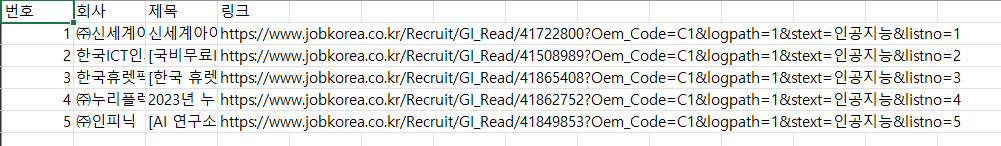

In [5]:
import requests as rq
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from urllib.parse import quote
import openpyxl

def job_crawling_xlsx(keyword, xlsx_file):
    #print(f"===JOB KOREA 검색: {keyword}===")
    url_encoded_keyword = quote(keyword)
    url = f"https://www.jobkorea.co.kr/Search/?stext={url_encoded_keyword}"
    #print(url)
    res = rq.get(url)
    soup = BeautifulSoup(res.text, 'lxml')
    tags = soup.select('.recruit-info .post', limit=5)
    
    wb = openpyxl.Workbook()
    sheet = wb.active
    
    header = ['번호', '회사', '제목', '링크']
    sheet.append(header)

    for i, t in enumerate(tags, 1):
        company = t.select_one('.post-list-corp a').text.strip()
        title = t.select_one('.post-list-info a').text.strip()
        link = urljoin(url, t.select_one('.post-list-info a').get('href'))
        #print(f"{i}. {company}:{title}")
        #print(link)
        row = [i, company, title, link]
        sheet.append(row)
    wb.save(xlsx_file)

# 아래는 수정하지 마시오.
job_crawling_xlsx("인공지능", 'jobs.xlsx') # 상대경로
